In [1]:
#QUESTION 9

In [162]:
import pandas as pd

# Read the data from CSV file
data = pd.read_csv('e22.csv')

# Remove commas from the specified columns
cols_to_clean = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS']
data[cols_to_clean] = data[cols_to_clean].replace({',': ''}, regex=True)

# Replace missing values with zero in the specified columns
cols_to_fill = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS']
data[cols_to_fill] = data[cols_to_fill].fillna(0)

# Change the data type to float in the specified columns
cols_to_convert = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS']
data[cols_to_convert] = data[cols_to_convert].astype(float)

# Print the cleaned data
(data)


,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),53226.90,0.0,1045845.44,463.52,0.0,0.0,12812.39,1112348.25,02186
1,"Cassellius,Brenda",Superintendent,Superintendent,179109.61,0.0,417839.83,0.00,0.0,0.0,0.00,596949.44,55419
2,"Dempsey,John",Boston Fire Department,Commissioner (BFD),133653.78,0.0,312752.53,0.00,0.0,0.0,0.00,446406.31,02152
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),145775.26,0.0,13932.92,196515.25,0.0,11880.0,29155.26,397258.69,02052
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,142535.62,0.0,18827.45,142692.38,0.0,46365.0,35633.88,386054.33,02186
...,...,...,...,...,...,...,...,...,...,...,...,...
23199,"wheeler,Stephen clifford",Boston Cntr - Youth & Families,Lifeguard I,42.01,0.0,0.00,0.00,0.0,0.0,0.00,42.01,02129
23200,"Harris,Gloria",BPS Office Of Budget Mgmt,Attendant,24.23,0.0,0.00,0.00,0.0,0.0,0.00,24.23,02136
23201,"Jackson,Wanita Tina",Boston Police Department,School Traffic Supv,23.68,0.0,0.00,0.00,0.0,0.0,0.00,23.68,02119
23202,"Paul,Desmond",BPS Substitute Teachers/Nurs,Substitute Teacher HE,21.28,0.0,0.00,0.00,0.0,0.0,0.00,21.28,02119


In [163]:
overtime_by_department_22 = data.groupby('DEPARTMENT_NAME')['OVERTIME'].sum().sort_values(ascending=False)

In [164]:
overtime_by_department_22.head(6)

DEPARTMENT_NAME
Boston Police Department    78265402.51
Boston Fire Department      42902465.65
Public Works Department      4908683.73
Property Management          2416436.55
BPS Facility Management      2210072.78
Parks Department             2090795.28
Name: OVERTIME, dtype: float64

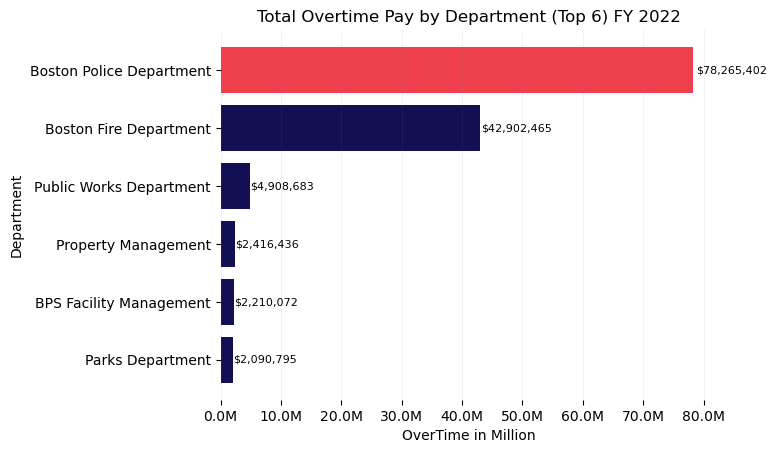

In [173]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sort the overtime_by_department_22 Series in ascending order
overtime_sorted = overtime_by_department_22.sort_values(ascending=True)

# Create a horizontal bar chart with the sorted values
ax = plt.gca()

# Use a custom color for the BPD bar
colors = ["#130F54"] * 6
colors[-1] = "#EF404E"

bars = ax.barh(overtime_sorted.index[-6:], overtime_sorted[-6:], color=colors)

# Set the title and axis labels
plt.title('Total Overtime Pay by Department (Top 6) FY 2022')
plt.xlabel('OverTime in Million')
plt.ylabel('Department')

# Add data labels on the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_width() * 1.007, bar.get_y() + bar.get_height()/2, f'${int(bar.get_width()):,}', ha='left', va='center',fontsize=8)

# Format the x-axis labels
def format_fn(value, tick_number):
    return f'{value/1_000_000:.1f}M'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_fn))

# Add vertical lines behind the bars
ax.grid(axis='x', color='gray', linestyle='-', alpha=0.1)

# Remove the borders around the figure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)

# Show the plot
plt.show()


In [9]:
# Load the data
data1 = pd.read_csv('e2021.csv',encoding='ISO-8859-1')

# Remove commas from numeric columns
data1[["REGULAR", "RETRO", "OTHER", "OVERTIME", "INJURED", "DETAIL", "QUINN_EDUCATION_INCENTIVE", "TOTAL_GROSS"]] = data1[["REGULAR", "RETRO", "OTHER", "OVERTIME", "INJURED", "DETAIL", "QUINN_EDUCATION_INCENTIVE", "TOTAL_GROSS"]].replace(",", "", regex=True)

# Replace missing values with zero
data1 = data1.fillna(0)

# Convert columns to float
data1[["REGULAR", "RETRO", "OTHER", "OVERTIME", "INJURED", "DETAIL", "QUINN_EDUCATION_INCENTIVE", "TOTAL_GROSS"]] = data1[["REGULAR", "RETRO", "OTHER", "OVERTIME", "INJURED", "DETAIL", "QUINN_EDUCATION_INCENTIVE", "TOTAL_GROSS"]].astype(float)


In [155]:
overtime_by_department_21 = data1.groupby('DEPARTMENT_NAME')['OVERTIME'].sum().sort_values(ascending=False)

In [156]:
overtime_by_department_21.head(6)

DEPARTMENT_NAME
Boston Police Department    72222785.03
Boston Fire Department      40043057.77
Public Works Department      3982020.93
BPS Facility Management      2849928.98
Property Management          2379766.76
Parks Department             1962509.13
Name: OVERTIME, dtype: float64

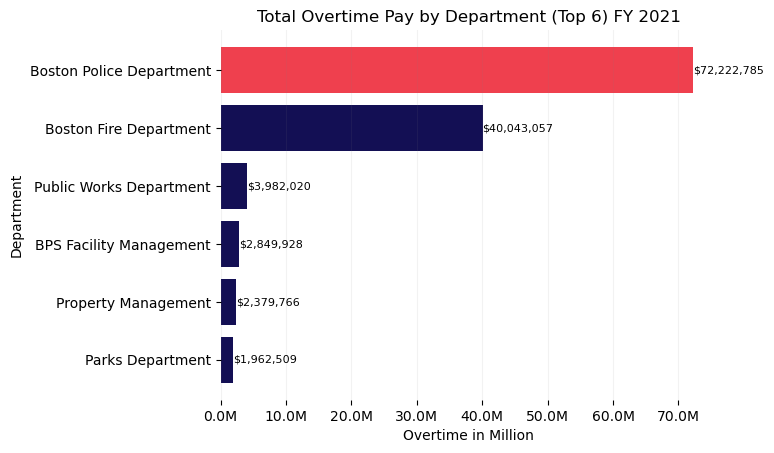

In [170]:
import matplotlib.pyplot as plt

# Sort the overtime_by_department_21 Series in descending order
overtime_sorted = overtime_by_department_21.sort_values(ascending=True)

# Create a horizontal bar chart with the sorted values
fig, ax = plt.subplots()
# Use a custom color for the BPD bar
colors = ["#130F54"] * 6
colors[-1] = "#EF404E"

bars = ax.barh(overtime_sorted.index[-6:], overtime_sorted[-6:], color=colors)
# Set the title and axis labels
ax.set_title('Total Overtime Pay by Department (Top 6) FY 2021')
ax.set_xlabel('Overtime in Million')
ax.set_ylabel('Department')

# Add data labels on the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'${int(bar.get_width()):,}', ha='left', va='center', fontsize=8)

    
def format_fn(value, tick_number):
    return f'{value/1_000_000:.1f}M'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_fn))    
    
# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add vertical grid lines
ax.grid(axis='x', color='gray', linestyle='-', alpha=0.1)

plt.show()


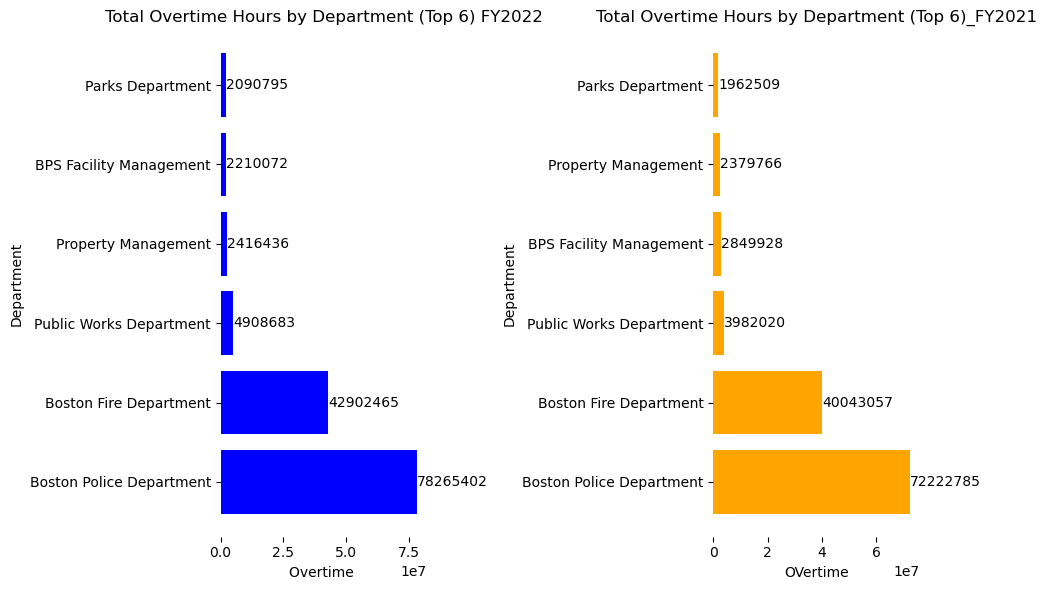

In [47]:
import matplotlib.pyplot as plt

# Set the figure size and create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=1.5)

# Create the first horizontal bar chart
ax1.barh(overtime_by_department_22.index[:6], overtime_by_department_22[:6], color='blue')
ax1.set_title('Total Overtime Hours by Department (Top 6) FY2022')
ax1.set_xlabel('Overtime ')
ax1.set_ylabel('Department')

# Add the values outside of each bar
for i, v in enumerate(overtime_by_department_22[:6]):
    ax1.text(v + 50, i, str(int(v)), color='Black', ha='left', va='center')

# Create the second horizontal bar chart
ax2.barh(overtime_by_department_21.index[:6], overtime_by_department_21[:6], color='orange')
ax2.set_title('Total Overtime Hours by Department (Top 6)_FY2021')
ax2.set_xlabel('OVertime')
ax2.set_ylabel('Department')

# Add the values outside of each bar
for i, v in enumerate(overtime_by_department_21[:6]):
    ax2.text(v + 50, i, str(int(v)), color='Black', ha='left', va='center')

# Remove the borders around the graph
for ax in [ax1, ax2]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
#QUESTION 10

In [57]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv("sample.csv")

# Filter the DataFrame to only include rows where DEPARTMENT_NAME is "Boston Police Department"
boston_pd = df[df["DEPARTMENT_NAME"] == "Boston Police Department"]

# Save the filtered DataFrame to a new CSV file
boston_pd.to_csv("boston_pd_salary.csv", index=False)


In [58]:
boston_pd.head(25)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),"53,226.90",NaN,"1,045,845.44",463.52,NaN,NaN,"12,812.39","1,112,348.25",02186
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"145,775.26",NaN,"13,932.92","196,515.25",NaN,"11,880.00","29,155.26","397,258.69",02052
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,"142,535.62",NaN,"18,827.45","142,692.38",NaN,"46,365.00","35,633.88","386,054.33",02186
5,"McCormick,Kelley J",Boston Police Department,Police Captain,"147,690.64",NaN,"7,452.73","83,593.06","16,410.06","78,060.00","41,025.08","374,231.57",02476
6,"Long,Gregory P",Boston Police Department,Supn-In Chief,"290,703.31",NaN,"30,244.46",NaN,NaN,NaN,"52,180.57","373,128.34",02021
7,"Danilecki,John H",Boston Police Department,Police Captain,"164,100.70",NaN,"24,504.13","71,315.48",NaN,"61,200.00","41,025.08","362,145.39",02559
8,"Webb,Keith A",Boston Police Department,Police Sergeant (Det),"130,930.12",NaN,"19,722.83","134,229.14",NaN,"37,312.00","32,732.72","354,926.81",02121
11,"Sweeney,Steven",Boston Police Department,Police Captain/DDC,"163,885.36",NaN,"24,423.09","118,219.68",NaN,"2,040.00","40,971.28","349,539.41",02131
14,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),"130,930.12",NaN,"16,723.95","163,494.70",NaN,NaN,"32,732.72","343,881.49",02132
15,"Lee,Waiman",Boston Police Department,Police Detective,"106,986.54",NaN,"19,004.27","77,288.44",NaN,"113,298.00","26,746.60","343,323.85",02134


In [59]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["INJURED"].isna().sum()

print(f"Number of NaN values in INJURED column: {num_nan}")


Number of NaN values in INJURED column: 2581


In [60]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["INJURED"].notna().sum()

print(f"Number of not NaN values in INJURED column: {num_nan}")

Number of not NaN values in INJURED column: 459


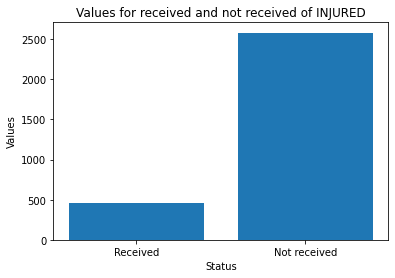

In [61]:
import matplotlib.pyplot as plt

# Define the data
y_values = [459, 2581]
x_labels = ['Received', 'Not received']

# Create the bar chart
plt.bar(x_labels, y_values)

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Values')
plt.title('Values for received and not received of INJURED')

# Display the plot
plt.show()


In [62]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["DETAIL"].isna().sum()

print(f"Number of NaN values in DETAIL column: {num_nan}")

Number of NaN values in DETAIL column: 1673


In [63]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["DETAIL"].notna().sum()

print(f"Number of not NaN values in DETAIL column: {num_nan}")

Number of not NaN values in DETAIL column: 1367


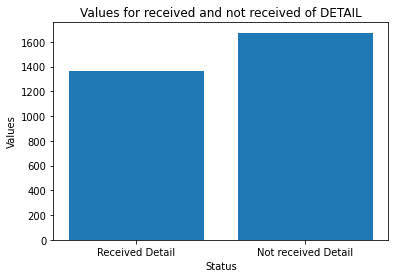

In [64]:
import matplotlib.pyplot as plt

# Define the data
y_values = [1367, 1673]
x_labels = ['Received Detail', 'Not received Detail']

# Create the bar chart
plt.bar(x_labels, y_values)

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Values')
plt.title('Values for received and not received of DETAIL')

# Display the plot
plt.show()

In [65]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["OTHER"].isna().sum()

print(f"Number of NaN values in OTHER column: {num_nan}")

Number of NaN values in OTHER column: 192


In [66]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["OTHER"].notna().sum()

print(f"Number of not NaN values in OTHER column: {num_nan}")

Number of not NaN values in OTHER column: 2848


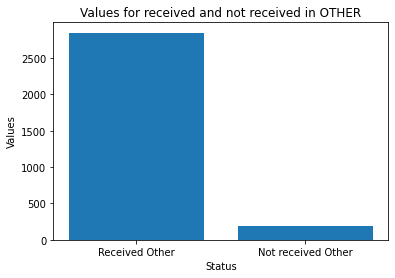

In [67]:
import matplotlib.pyplot as plt

# Define the data
y_values = [2848, 192]
x_labels = ['Received Other', 'Not received Other']

# Create the bar chart
plt.bar(x_labels, y_values)

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Values')
plt.title('Values for received and not received in OTHER')

# Display the plot
plt.show()

In [68]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["RETRO"].isna().sum()

print(f"Number of NaN values in RETRO column: {num_nan}")

Number of NaN values in RETRO column: 2694


In [69]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["RETRO"].notna().sum()

print(f"Number of not NaN values in RETRO column: {num_nan}")

Number of not NaN values in RETRO column: 346


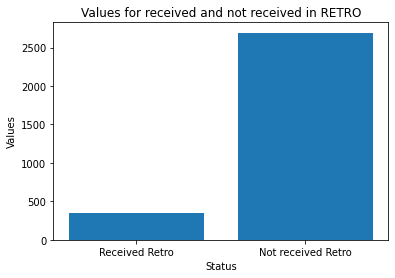

In [70]:
import matplotlib.pyplot as plt

# Define the data
y_values = [346, 2694]
x_labels = ['Received Retro', 'Not received Retro']

# Create the bar chart
plt.bar(x_labels, y_values)

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Values')
plt.title('Values for received and not received in RETRO')

# Display the plot
plt.show()

In [71]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["REGULAR"].isna().sum()

print(f"Number of NaN values in REGULAR column: {num_nan}")

Number of NaN values in REGULAR column: 181


In [72]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["REGULAR"].notna().sum()

print(f"Number of not NaN values in REGULAR column: {num_nan}")

Number of not NaN values in REGULAR column: 2859


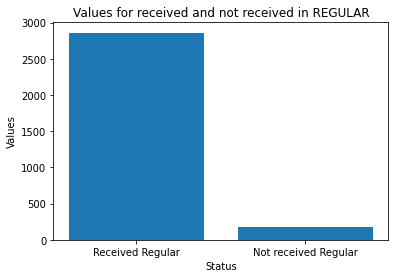

In [73]:
import matplotlib.pyplot as plt

# Define the data
y_values = [2859, 181]
x_labels = ['Received Regular', 'Not received Regular']

# Create the bar chart
plt.bar(x_labels, y_values)

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Values')
plt.title('Values for received and not received in REGULAR')

# Display the plot
plt.show()

In [74]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["OVERTIME"].isna().sum()

print(f"Number of NaN values in OVERTIME column: {num_nan}")

Number of NaN values in OVERTIME column: 613


In [75]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["OVERTIME"].notna().sum()

print(f"Number of not NaN values in OVERTIME column: {num_nan}")

Number of not NaN values in OVERTIME column: 2427


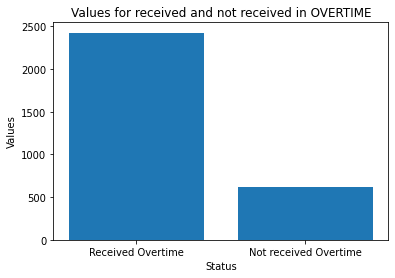

In [76]:
import matplotlib.pyplot as plt

# Define the data
y_values = [2427, 613]
x_labels = ['Received Overtime', 'Not received Overtime']

# Create the bar chart
plt.bar(x_labels, y_values)

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Values')
plt.title('Values for received and not received in OVERTIME')

# Display the plot
plt.show()

In [77]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["QUINN_EDUCATION"].isna().sum()

print(f"Number of NaN values in QUINN_EDUCATION column: {num_nan}")

Number of NaN values in QUINN_EDUCATION column: 1676


In [78]:
import pandas as pd

data = pd.read_csv("boston_pd_salary.csv")
num_nan = data["QUINN_EDUCATION"].notna().sum()

print(f"Number of not NaN values in QUINN_EDUCATION column: {num_nan}")

Number of not NaN values in QUINN_EDUCATION column: 1364


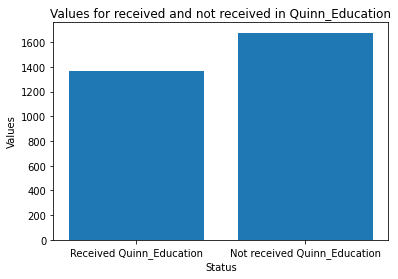

In [79]:
import matplotlib.pyplot as plt

# Define the data
y_values = [1364, 1676]
x_labels = ['Received Quinn_Education', 'Not received Quinn_Education']

# Create the bar chart
plt.bar(x_labels, y_values)

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Values')
plt.title('Values for received and not received in Quinn_Education')

# Display the plot
plt.show()

In [80]:
import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary.csv')

# sum up the values in the REGULAR column
regular_sum = df['REGULAR'].str.replace(',', '').astype(float).sum()

print(f"The sum of the numerical values in the REGULAR column is {regular_sum:.2f}")


The sum of the numerical values in the REGULAR column is 233841180.83


In [81]:
import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary.csv')

# sum up the values in the REGULAR column
regular_sum = df['RETRO'].str.replace(',', '').astype(float).sum()

print(f"The sum of the numerical values in the RETRO column is {regular_sum:.2f}")


The sum of the numerical values in the RETRO column is 687174.50


In [82]:
import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary.csv')

# sum up the values in the REGULAR column
regular_sum = df['OTHER'].str.replace(',', '').astype(float).sum()

print(f"The sum of the numerical values in the OTHER column is {regular_sum:.2f}")


The sum of the numerical values in the OTHER column is 18060413.40


In [83]:
import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary.csv')

# sum up the values in the REGULAR column
regular_sum = df['OVERTIME'].str.replace(',', '').astype(float).sum()

print(f"The sum of the numerical values in the OVERTIME column is {regular_sum:.2f}")


The sum of the numerical values in the OVERTIME column is 78265402.51


In [84]:
import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary.csv')

# sum up the values in the REGULAR column
regular_sum = df['INJURED'].str.replace(',', '').astype(float).sum()

print(f"The sum of the numerical values in the INJURED column is {regular_sum:.2f}")


The sum of the numerical values in the INJURED column is 23628467.04


In [85]:
import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary.csv')

# sum up the values in the REGULAR column
regular_sum = df['DETAIL'].str.replace(',', '').astype(float).sum()

print(f"The sum of the numerical values in the DETAIL column is {regular_sum:.2f}")


The sum of the numerical values in the DETAIL column is 23280403.00


In [86]:
import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary.csv')

# sum up the values in the REGULAR column
regular_sum = df['QUINN_EDUCATION'].str.replace(',', '').astype(float).sum()

print(f"The sum of the numerical values in the QUINN_EDUCATION column is {regular_sum:.2f}")


The sum of the numerical values in the QUINN_EDUCATION column is 28060018.53


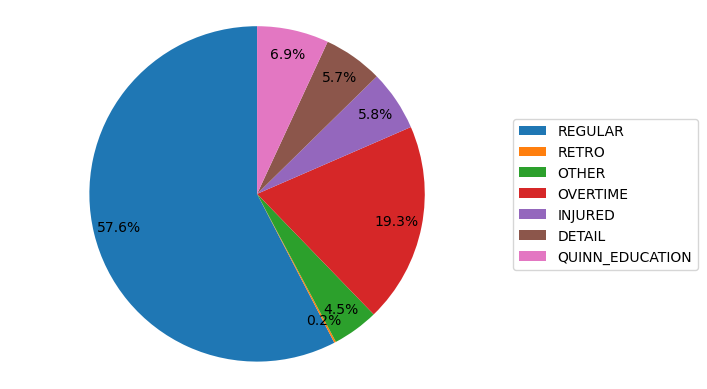

In [256]:
import matplotlib.pyplot as plt

# Data
labels = ['REGULAR','RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION']
sizes = [233841180.83,687174.50, 18060413.40, 78265402.51, 23628467.04, 23280403.00, 28060018.53]

# Plot
fig1, ax1 = plt.subplots()
wedges, _, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10})
ax1.axis('equal')

# Add legend
plt.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Increase the font size of percentage values
for autotext in autotexts:
    autotext.set_fontsize(10)

# Show plot
plt.show()


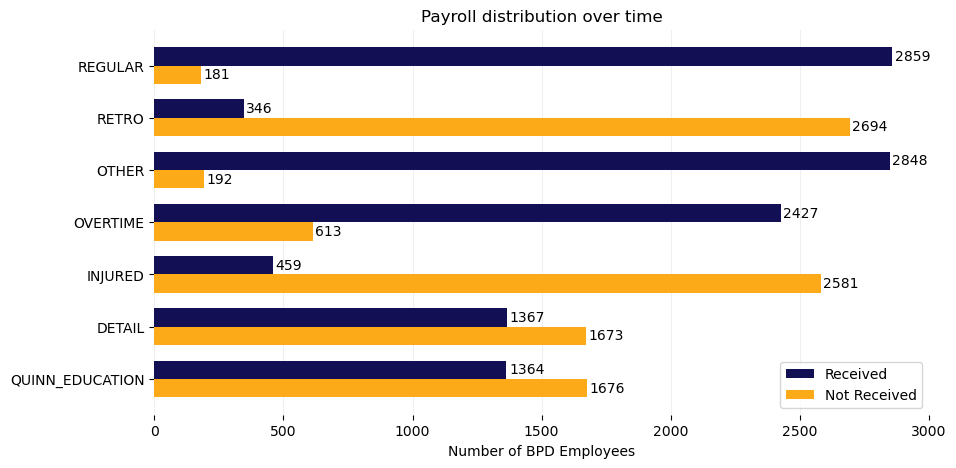

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
names = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION']
rec_2022 = [2859, 346, 2848, 2427, 459, 1367, 1364]
notrec_2022 = [181, 2694, 192, 613, 2581, 1673, 1676]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the horizontal bars for 2021 data
y_pos = np.arange(len(names))
width = 0.35
ax.barh(y_pos - width / 2, rec_2022, width, label='Received', color='#130F54', zorder=2)
ax.barh(y_pos + width / 2, notrec_2022, width, label='Not Received', color='#FCAA17', zorder=2)

# Add vertical lines on the x-axis behind the bars
ax.grid(axis='x', linestyle='-', alpha=0.2, zorder=0)

# Add labels to the bars and axes
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of BPD Employees')
ax.set_title('Payroll distribution over time')
ax.legend()

# Add labels to the bars
for i, v in enumerate(rec_2022):
    ax.text(v + 10, i - width / 2, str(v), color='black', ha='left', va='center')

for i, v in enumerate(notrec_2022):
    ax.text(v + 10, i + width / 2, str(v), color='black', ha='left', va='center')

# Remove border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.show()


In [ ]:
#QUESTION 11

In [58]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv("e2021.csv", encoding='ISO-8859-1')


# Filter the DataFrame to only include rows where DEPARTMENT_NAME is "Boston Police Department"
boston_pd_21 = df[df["DEPARTMENT_NAME"] == "Boston Police Department"]

# Save the filtered DataFrame to a new CSV file
boston_pd.to_csv("boston_pd_salary_2021.csv", index=False)


In [65]:
boston_pd_21.head(20)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL
0,"Beckers,Richard",Boston Police Department,Police Officer,NaN,NaN,"1,264,843.63",NaN,NaN,NaN,NaN,"1,264,843.63",02119
1,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,NaN,NaN,"1,252,990.81",NaN,NaN,NaN,NaN,"1,252,990.81",02129
2,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,"69,772.10",NaN,"212,739.48","82,300.87","30,939.24","12,144.00","25,178.06","433,073.75",02130
3,"Washington,Walter",Boston Police Department,Police Officer,"100,963.38",NaN,"211,900.28","67,849.66",NaN,"9,016.00","10,096.55","399,825.87",02368
4,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,"109,858.02",NaN,"192,097.54","75,938.65",NaN,"19,550.00",NaN,"397,444.21",02301
5,"Joseph,Martin M",Boston Police Department,Police Sergeant (Det),"127,626.76",NaN,"124,524.50","66,433.83",NaN,"50,085.00","12,762.78","381,432.87",02124
6,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"142,466.41",NaN,"15,820.50","167,509.61",NaN,"24,695.00","28,198.49","378,690.01",02052
7,"Smith,Sean P",Boston Police Department,Police Lieutenant,"143,566.78",NaN,"16,789.43","109,101.43",NaN,"53,240.00","35,891.85","358,589.49",02186
8,"Lee,Waiman",Boston Police Department,Police Detective,"107,352.54",NaN,"16,324.27","76,434.46",NaN,"123,234.00","26,838.11","350,183.38",02134
9,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),"130,930.12",NaN,"16,723.95","166,042.24",NaN,NaN,"32,732.73","346,429.04",02132


In [77]:
import pandas as pd

# Load data from the provided table
data = pd.read_csv("boston_pd_salary_2021.csv")

# Select specific columns and create a new DataFrame
new_data_tgross = data.loc[:, ['NAME', 'DEPARTMENT_NAME', 'TITLE', 'TOTAL_GROSS']]

# Display the new DataFrame
(new_data_tgross.head(20))


,NAME,DEPARTMENT_NAME,TITLE,TOTAL_GROSS
0,"Beckers,Richard",Boston Police Department,Police Officer,"1,264,843.63"
1,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,"1,252,990.81"
2,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,"433,073.75"
3,"Washington,Walter",Boston Police Department,Police Officer,"399,825.87"
4,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,"397,444.21"
5,"Joseph,Martin M",Boston Police Department,Police Sergeant (Det),"381,432.87"
6,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"378,690.01"
7,"Smith,Sean P",Boston Police Department,Police Lieutenant,"358,589.49"
8,"Lee,Waiman",Boston Police Department,Police Detective,"350,183.38"
9,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),"346,429.04"


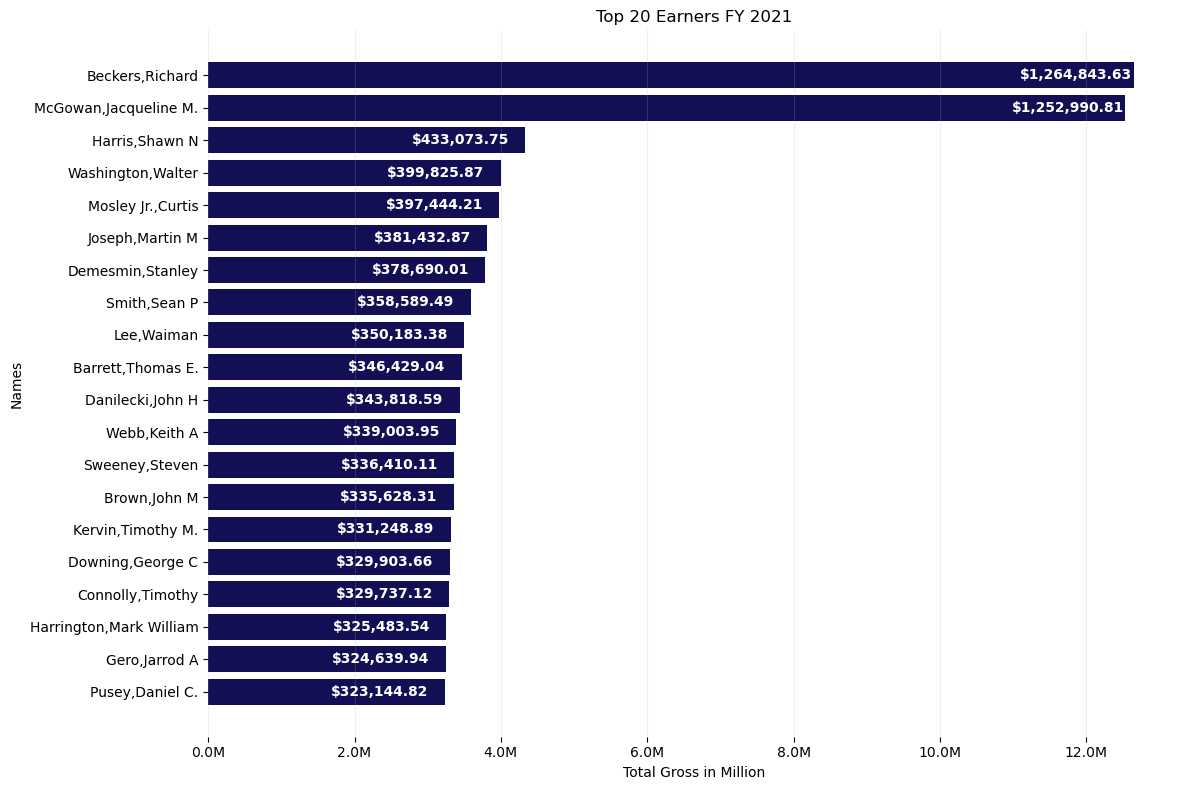

In [179]:
import matplotlib.pyplot as plt

# Data
names = [
    "Beckers,Richard", "McGowan,Jacqueline M.", "Harris,Shawn N", "Washington,Walter",
    "Mosley Jr.,Curtis", "Joseph,Martin M", "Demesmin,Stanley", "Smith,Sean P",
    "Lee,Waiman", "Barrett,Thomas E.", "Danilecki,John H", "Webb,Keith A",
    "Sweeney,Steven", "Brown,John M", "Kervin,Timothy M.", "Downing,George C",
    "Connolly,Timothy", "Harrington,Mark William", "Gero,Jarrod A", "Pusey,Daniel C."
]
total_gross = [
    1264843.63, 1252990.81, 433073.75, 399825.87, 397444.21, 381432.87,
    378690.01, 358589.49, 350183.38, 346429.04, 343818.59, 339003.95,
    336410.11, 335628.31, 331248.89, 329903.66, 329737.12, 325483.54,
    324639.94, 323144.82
]

# Sort the data by total gross in ascending order
sorted_data = sorted(zip(total_gross, names), key=lambda x: x[0])
sorted_total_gross, sorted_names = zip(*sorted_data)

# Formatter for x-axis tick labels
def millions_formatter(x, pos):
    return f'{x / 100000:.1f}M'

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_names, sorted_total_gross,color="#130F54")

# Add values on the bars
for bar in bars:
    plt.text(bar.get_width() - 155000, bar.get_y() + bar.get_height() / 2, f'${bar.get_width():,.2f}', va='center', color='white', fontweight='bold')

# Remove border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Add vertical lines on the x-axis behind the bars
plt.grid(axis='x', linestyle='-', alpha=0.2)

# Set labels and title
plt.xlabel("Total Gross in Million")
plt.ylabel("Names")
plt.title("Top 20 Earners FY 2021")

# Set x-axis tick labels to show values in millions
formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)


# Show the chart
plt.tight_layout()
plt.show()


In [101]:
boston_pd_22 

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),"53,226.90",NaN,"1,045,845.44",463.52,NaN,NaN,"12,812.39","1,112,348.25",02186
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"145,775.26",NaN,"13,932.92","196,515.25",NaN,"11,880.00","29,155.26","397,258.69",02052
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,"142,535.62",NaN,"18,827.45","142,692.38",NaN,"46,365.00","35,633.88","386,054.33",02186
5,"McCormick,Kelley J",Boston Police Department,Police Captain,"147,690.64",NaN,"7,452.73","83,593.06","16,410.06","78,060.00","41,025.08","374,231.57",02476
6,"Long,Gregory P",Boston Police Department,Supn-In Chief,"290,703.31",NaN,"30,244.46",NaN,NaN,NaN,"52,180.57","373,128.34",02021
...,...,...,...,...,...,...,...,...,...,...,...,...
23125,"Barker,Tyreek James",Boston Police Department,Cadet (Police),334.28,NaN,NaN,NaN,NaN,NaN,NaN,334.28,02124
23160,"Barnes,Marlene Annmarie",Boston Police Department,School Traffic Supv,237.40,NaN,NaN,NaN,NaN,NaN,NaN,237.40,02130
23165,"Maldonado,Eliezer",Boston Police Department,Cadet (Police),222.85,NaN,NaN,NaN,NaN,NaN,NaN,222.85,02127
23171,"Moore,Anne C",Boston Police Department,School Traffic Supv,NaN,NaN,189.45,NaN,NaN,NaN,NaN,189.45,02125


In [107]:
selected_columns = boston_pd_22[['NAME', 'TITLE', 'TOTAL_ GROSS']]
selected_columns.head(20)

,NAME,TITLE,TOTAL_ GROSS
0,"Gavin,Donna M.",Police Lieutenant (Det),"1,112,348.25"
3,"Demesmin,Stanley",Police Lieutenant (Det),"397,258.69"
4,"Smith,Sean P",Police Lieutenant,"386,054.33"
5,"McCormick,Kelley J",Police Captain,"374,231.57"
6,"Long,Gregory P",Supn-In Chief,"373,128.34"
7,"Danilecki,John H",Police Captain,"362,145.39"
8,"Webb,Keith A",Police Sergeant (Det),"354,926.81"
11,"Sweeney,Steven",Police Captain/DDC,"349,539.41"
14,"Barrett,Thomas E.",Police Sergeant (Det),"343,881.49"
15,"Lee,Waiman",Police Detective,"343,323.85"


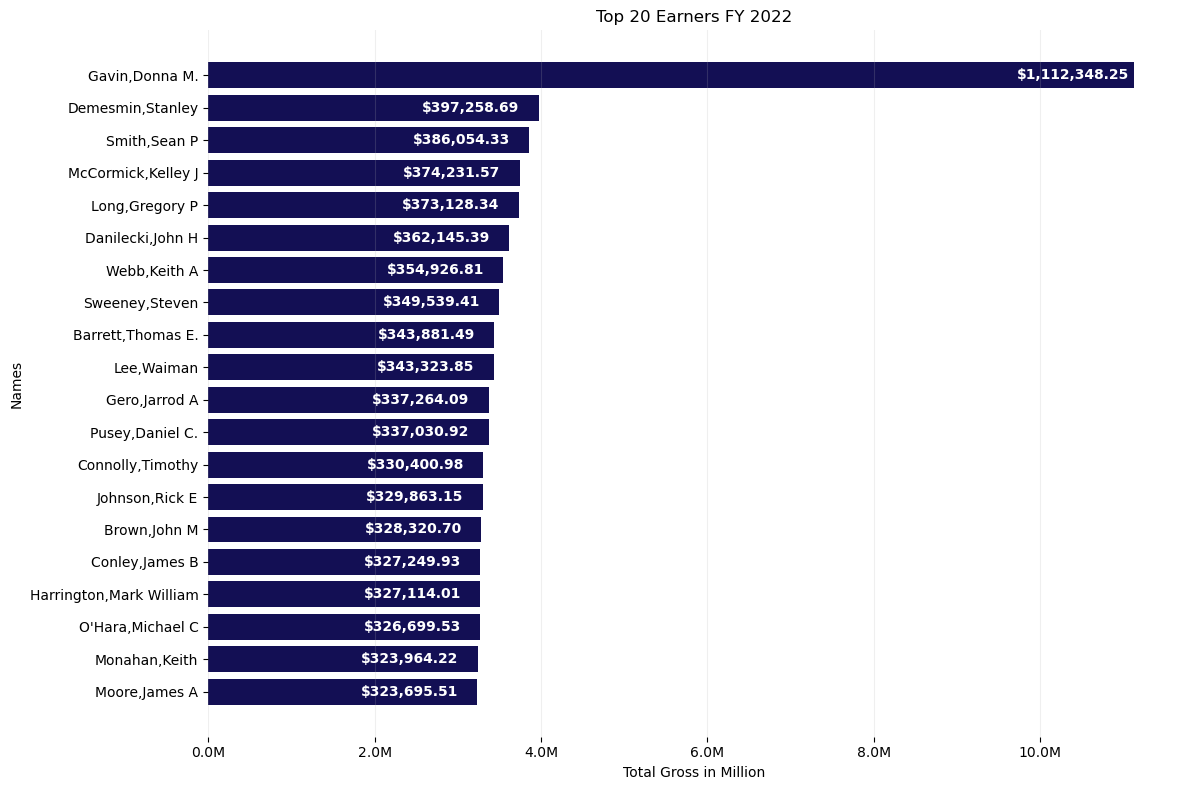

In [180]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data
names = [
    "Gavin,Donna M.", "Demesmin,Stanley", "Smith,Sean P", "McCormick,Kelley J",
    "Long,Gregory P", "Danilecki,John H", "Webb,Keith A", "Sweeney,Steven",
    "Barrett,Thomas E.", "Lee,Waiman", "Gero,Jarrod A", "Pusey,Daniel C.",
    "Connolly,Timothy", "Johnson,Rick E", "Brown,John M", "Conley,James B",
    "Harrington,Mark William", "O'Hara,Michael C", "Monahan,Keith", "Moore,James A"
]
total_gross = [
    1112348.25, 397258.69, 386054.33, 374231.57, 373128.34,
    362145.39, 354926.81, 349539.41, 343881.49, 343323.85,
    337264.09, 337030.92, 330400.98, 329863.15, 328320.70,
    327249.93, 327114.01, 326699.53, 323964.22, 323695.51
]

# Sort the data by total gross in descending order
sorted_data = sorted(zip(total_gross, names), key=lambda x: x[0])
sorted_total_gross, sorted_names = zip(*sorted_data)

# Formatter for x-axis tick labels
def millions_formatter(x, pos):
    return f'{x / 100000:.1f}M'

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_names, sorted_total_gross,color="#130F54")

# Add values on the bars
for bar in bars:
    plt.text(bar.get_width() - 140000, bar.get_y() + bar.get_height() / 2, f'${bar.get_width():,.2f}', va='center', color='white', fontweight='bold')

# Remove border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Add vertical lines on the x-axis behind the bars
plt.grid(axis='x', linestyle='-', alpha=0.2)

# Set labels and title
plt.xlabel("Total Gross in Million")
plt.ylabel("Names")
plt.title("Top 20 Earners FY 2022")

# Set x-axis tick labels to show values in millions
formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
#QUESTION 12

In [ ]:
#REGULAR

In [199]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df2022 = boston_pd_22 
#df2022['REGULAR'] = df2022['REGULAR'].str.replace(',', '').astype(float)

# Sort the DataFrame by TOTAL_GROSS in descending order
df_reg = df2022.sort_values(by=["REGULAR"], ascending=False)

# Print the top 20 entries
#top20_ = df.head(20)
df_reg.head(20)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
6,"Long,Gregory P",Boston Police Department,Supn-In Chief,290703.31,NaN,"30,244.46",NaN,NaN,NaN,"52,180.57","373,128.34",02021
140,"Walcott,Jeffrey I",Boston Police Department,Supn Bpd,199239.17,NaN,"29,092.97",NaN,NaN,NaN,"39,847.86","268,180.00",02118
105,"Colon,Felipe I.",Boston Police Department,Police Lieutenant (Det),199239.17,NaN,"29,092.97",NaN,NaN,NaN,"49,809.76","278,141.90",02136
106,"Eddings,Marcus C",Boston Police Department,Supn Bpd,199239.17,NaN,"29,042.97",NaN,NaN,NaN,"49,809.76","278,091.90",02126
120,"Baston,Nora L",Boston Police Department,Supn Bpd,199239.17,NaN,"24,535.30",NaN,NaN,NaN,"49,809.76","273,584.23",02131
107,"Dottin,Sharon",Boston Police Department,Supn Bpd,199085.85,NaN,"29,042.97",NaN,NaN,NaN,"49,771.45","277,900.27",02136
138,"Chin,James K.Y",Boston Police Department,Supn Bpd,191699.18,NaN,"29,042.97",NaN,NaN,NaN,"47,924.78","268,666.93",02136
152,"Cullinane,Lanita D",Boston Police Department,Supn Bpd,186817.74,NaN,"28,903.18",NaN,"1,295.34",NaN,"47,028.26","264,044.52",02132
562,"Cahill,Gerald",Boston Police Department,Dep Supn (Bpd),186275.83,NaN,"27,524.87",NaN,NaN,NaN,NaN,"213,800.70",02124
310,"Curry,Carmen L",Boston Police Department,Dep Supn (Bpd),178917.96,NaN,"19,991.66",NaN,NaN,NaN,"35,783.54","234,693.16",02136


In [207]:
# Create a new DataFrame with only 'NAME', 'TITLE', and 'Regular' columns
filtered_data_reg = df_reg[['NAME', 'TITLE', 'REGULAR']].head(20)

(filtered_data_reg)


,NAME,TITLE,REGULAR
6,"Long,Gregory P",Supn-In Chief,290703.31
140,"Walcott,Jeffrey I",Supn Bpd,199239.17
105,"Colon,Felipe I.",Police Lieutenant (Det),199239.17
106,"Eddings,Marcus C",Supn Bpd,199239.17
120,"Baston,Nora L",Supn Bpd,199239.17
107,"Dottin,Sharon",Supn Bpd,199085.85
138,"Chin,James K.Y",Supn Bpd,191699.18
152,"Cullinane,Lanita D",Supn Bpd,186817.74
562,"Cahill,Gerald",Dep Supn (Bpd),186275.83
310,"Curry,Carmen L",Dep Supn (Bpd),178917.96


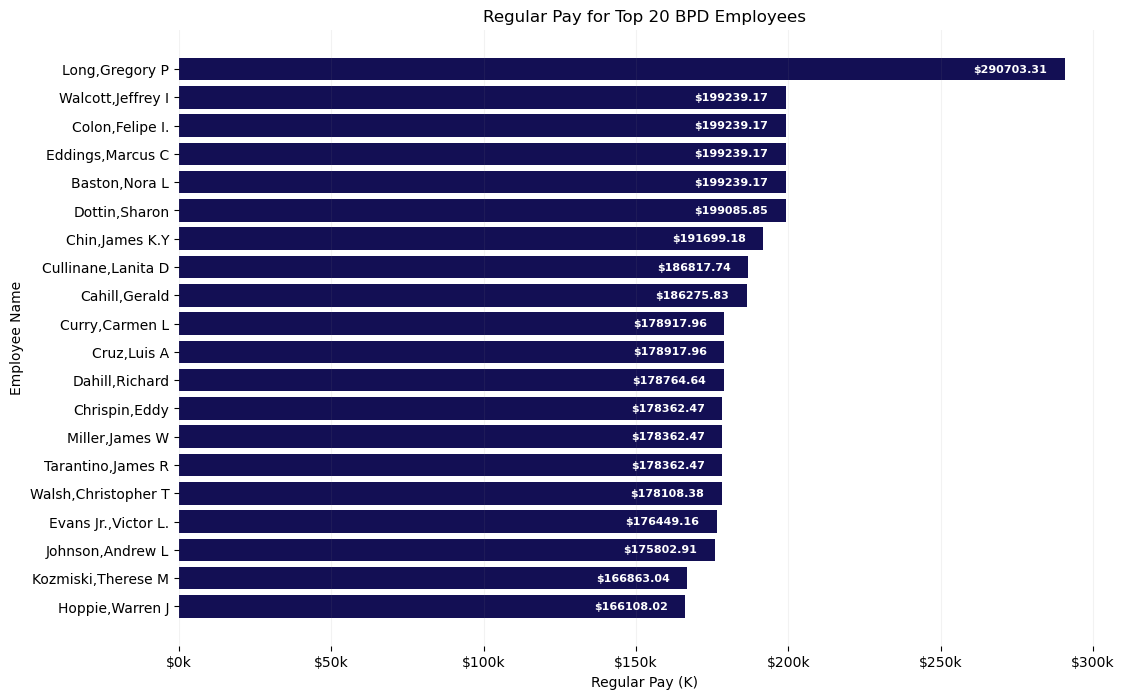

In [234]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Extract data from the filtered_data DataFrame
names = filtered_data['NAME'][::-1]  # Reverse the order
titles = filtered_data['TITLE']
regular_pay = filtered_data['REGULAR'][::-1]  # Reverse the order

# Create a horizontal bar chart with the specified color
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(names, regular_pay, color="#130F54")

# Add data labels on the bars
for bar in bars:
    value = bar.get_width()
    ax.text(value - 30000, bar.get_y() + bar.get_height() / 2, f'${value:.2f}', ha='left', va='center', color='white', fontweight='bold', fontsize=8)

# Set the title and axis labels
ax.set_title('Regular Pay for Top 20 BPD Employees')
ax.set_xlabel('Regular Pay (K)')
ax.set_ylabel('Employee Name')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add vertical grid lines
ax.grid(axis='x', color='gray', linestyle='-', alpha=0.1, zorder=-1)

# Format x-axis labels
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x / 1e3:.0f}k'))

# Set x-axis ticks
ax.set_xticks(range(0, int(regular_pay.max()) + 50000, 50000))

# Display the graph
plt.show()


In [ ]:
#OTHER

In [239]:
# Read the CSV file into a pandas DataFrame
df2022 = boston_pd_22 
#df2022['OTHER'] = df2022['OTHER'].str.replace(',', '').astype(float)

# Sort the DataFrame by TOTAL_GROSS in descending order
df_other = df2022.sort_values(by=["OTHER"], ascending=False)

# Print the top 20 entries
#top20_ = df.head(20)
df_other.head(20)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),53226.90,NaN,1045845.44,463.52,NaN,NaN,"12,812.39","1,112,348.25",02186
434,"Bailey,Gerard W",Boston Police Department,Supn Bpd,81138.12,NaN,123248.23,NaN,NaN,NaN,"19,382.98","223,769.33",02171
1773,"Cotter,Winifred",Boston Police Department,Supn Bpd,38765.99,NaN,116996.11,NaN,NaN,NaN,"9,691.49","165,453.59",02127
4191,"Donovan,Paul R",Boston Police Department,Supn Bpd,12621.48,NaN,114117.67,NaN,NaN,NaN,"1,442.46","128,181.61",02645
907,"Hayes,Mark P.",Boston Police Department,Police Captain (Det),67647.18,NaN,98041.19,"10,027.67",NaN,NaN,"16,911.90","192,627.94",02359
594,"Cooper,D Mark",Boston Police Department,Police Lieutenant,471.23,NaN,95414.91,NaN,"92,008.14",NaN,"23,002.15","210,896.43",02081
1052,"Teahan,Thomas J",Boston Police Department,Police Lieutenant (Det),133.49,NaN,91961.83,NaN,"76,257.55",NaN,"18,726.88","187,079.75",02649
947,"Gaines,Kenneth J",Boston Police Department,Dep Supn (Bpd),79339.19,NaN,91922.30,NaN,NaN,NaN,"19,834.80","191,096.29",02125
350,"Lynch,Joseph",Boston Police Department,Police Officer,105241.90,NaN,90672.45,"32,482.43",NaN,"2,024.00",NaN,"230,420.78",02171
5636,"Russell,Paul J.",Boston Police Department,Police Captain/DDC,NaN,NaN,88056.93,NaN,"25,934.81",NaN,"6,483.72","120,475.46",02050


In [241]:
# Create a new DataFrame with only 'NAME', 'TITLE', and 'Regular' columns
filtered_data_other = df_other[['NAME', 'TITLE', 'OTHER']].head(20)

(filtered_data_other)


,NAME,TITLE,OTHER
0,"Gavin,Donna M.",Police Lieutenant (Det),1045845.44
434,"Bailey,Gerard W",Supn Bpd,123248.23
1773,"Cotter,Winifred",Supn Bpd,116996.11
4191,"Donovan,Paul R",Supn Bpd,114117.67
907,"Hayes,Mark P.",Police Captain (Det),98041.19
594,"Cooper,D Mark",Police Lieutenant,95414.91
1052,"Teahan,Thomas J",Police Lieutenant (Det),91961.83
947,"Gaines,Kenneth J",Dep Supn (Bpd),91922.30
350,"Lynch,Joseph",Police Officer,90672.45
5636,"Russell,Paul J.",Police Captain/DDC,88056.93


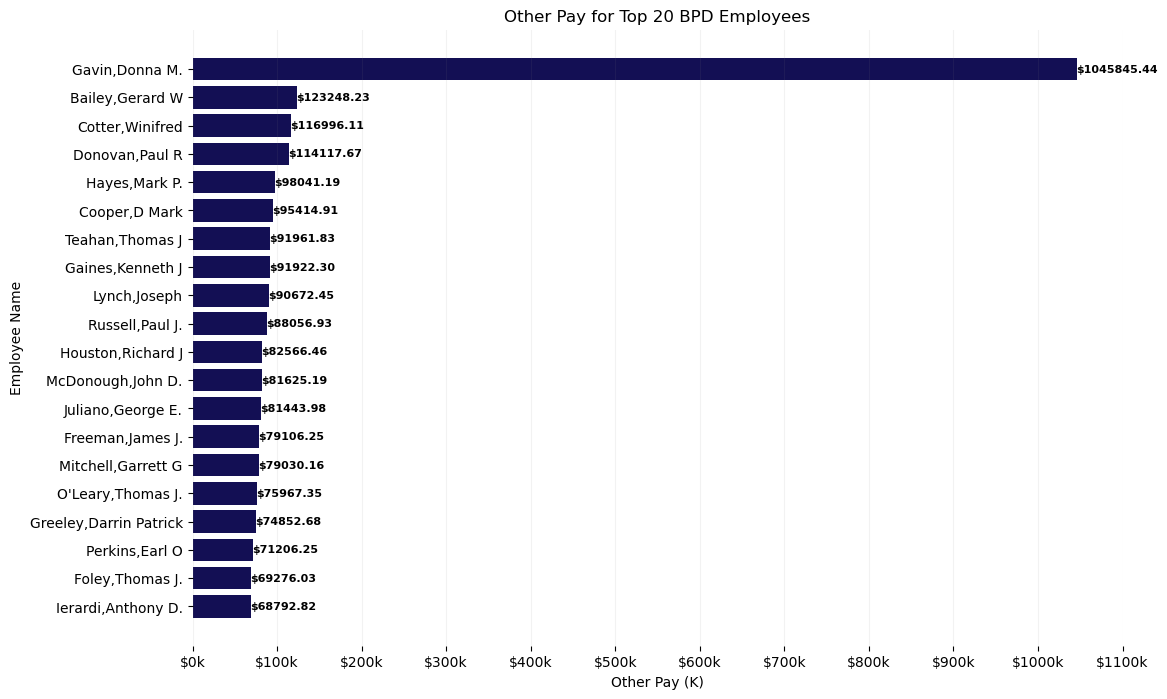

In [247]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Extract data from the filtered_data DataFrame
names = filtered_data_other['NAME'][::-1]  # Reverse the order
titles = filtered_data_other['TITLE']
regular_pay = filtered_data_other['OTHER'][::-1]  # Reverse the order

# Create a horizontal bar chart with the specified color
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(names, regular_pay, color="#130F54")

# Add data labels on the bars
for bar in bars:
    value = bar.get_width()
    ax.text(value - 1000, bar.get_y() + bar.get_height() / 2, f'${value:.2f}', ha='left', va='center', color='Black', fontweight='bold', fontsize=8)

# Set the title and axis labels
ax.set_title('Other Pay for Top 20 BPD Employees')
ax.set_xlabel('Other Pay (K)')
ax.set_ylabel('Employee Name')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add vertical grid lines
ax.grid(axis='x', color='gray', linestyle='-', alpha=0.1, zorder=-1)

# Format x-axis labels
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x / 1e3:.0f}k'))

# Set x-axis ticks
ax.set_xticks(range(0, int(regular_pay.max()) + 100000, 100000))

# Display the graph
plt.show()


In [ ]:
#Overtime

In [249]:
# Read the CSV file into a pandas DataFrame
df2022 = boston_pd_22 
#df2022['OVERTIME'] = df2022['OVERTIME'].str.replace(',', '').astype(float)

# Sort the DataFrame by TOTAL_GROSS in descending order
df_ot = df2022.sort_values(by=["OVERTIME"], ascending=False)

# Print the top 20 entries
#top20_ = df.head(20)
df_ot.head(20)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),145775.26,NaN,13932.92,196515.25,NaN,"11,880.00","29,155.26","397,258.69",02052
14,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),130930.12,NaN,16723.95,163494.70,NaN,NaN,"32,732.72","343,881.49",02132
31,"Downey,Paul J",Boston Police Department,Police Sergeant,136588.74,NaN,3187.71,163269.38,NaN,"12,402.00",NaN,"315,447.83",02132
111,"Acosta,Jose L",Boston Police Department,Police Officer,109502.02,NaN,10665.06,151608.89,NaN,"5,152.00",NaN,"276,927.97",01960
19,"Johnson,Rick E",Boston Police Department,Police Sergeant (Det),127626.76,NaN,19246.67,150658.84,NaN,424.00,"31,906.88","329,863.15",02072
20,"Brown,John M",Boston Police Department,Police Sergeant (Det),130930.12,NaN,17903.50,146754.36,NaN,NaN,"32,732.72","328,320.70",02136
135,"Jones,Craig D",Boston Police Department,Police Officer,108038.52,NaN,10583.21,144457.87,NaN,"6,302.00",NaN,"269,381.60",02324
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,142535.62,NaN,18827.45,142692.38,NaN,"46,365.00","35,633.88","386,054.33",02186
203,"Christie,Albert C",Boston Police Department,Police Officer,109502.02,NaN,850.00,141222.99,NaN,NaN,NaN,"251,575.01",02126
25,"Moore,James A",Boston Police Department,Police Sergeant (Det),132073.96,NaN,19196.67,140518.00,NaN,NaN,"31,906.88","323,695.51",02131


In [250]:
# Create a new DataFrame with only 'NAME', 'TITLE', and 'Regular' columns
filtered_data_ot = df_ot[['NAME', 'TITLE', 'OVERTIME']].head(20)

(filtered_data_ot)


,NAME,TITLE,OVERTIME
3,"Demesmin,Stanley",Police Lieutenant (Det),196515.25
14,"Barrett,Thomas E.",Police Sergeant (Det),163494.70
31,"Downey,Paul J",Police Sergeant,163269.38
111,"Acosta,Jose L",Police Officer,151608.89
19,"Johnson,Rick E",Police Sergeant (Det),150658.84
20,"Brown,John M",Police Sergeant (Det),146754.36
135,"Jones,Craig D",Police Officer,144457.87
4,"Smith,Sean P",Police Lieutenant,142692.38
203,"Christie,Albert C",Police Officer,141222.99
25,"Moore,James A",Police Sergeant (Det),140518.00


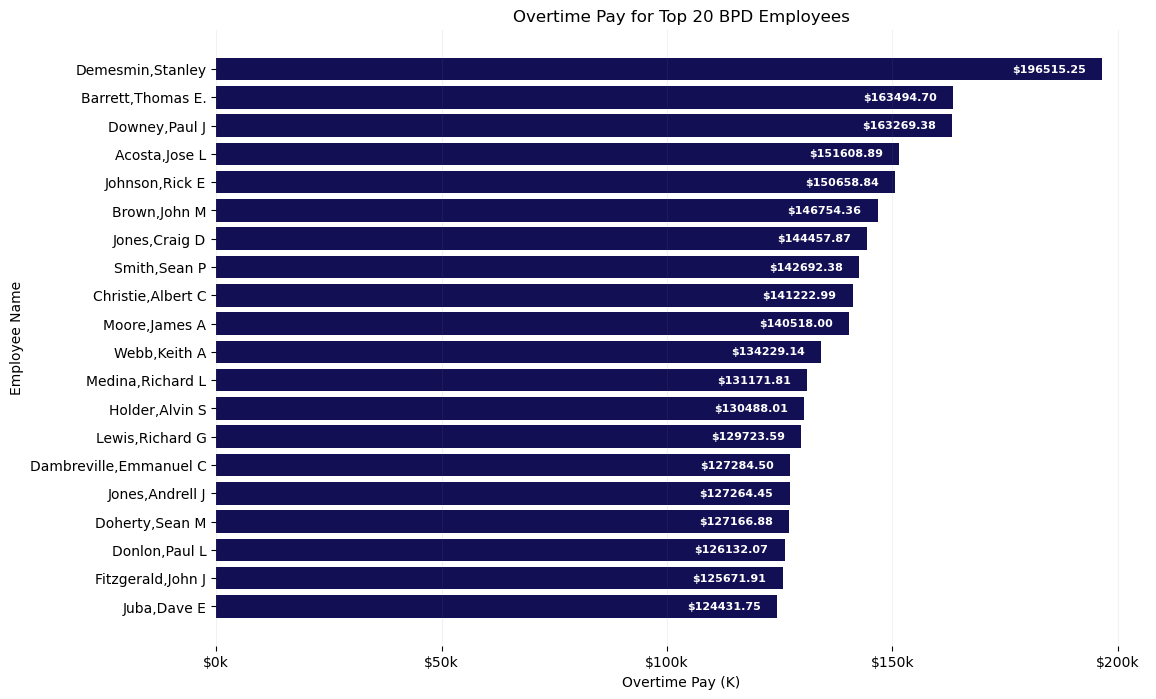

In [255]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Extract data from the filtered_data DataFrame
names = filtered_data_ot['NAME'][::-1]  # Reverse the order
titles = filtered_data_ot['TITLE']
regular_pay = filtered_data_ot['OVERTIME'][::-1]  # Reverse the order

# Create a horizontal bar chart with the specified color
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(names, regular_pay, color="#130F54")

# Add data labels on the bars
for bar in bars:
    value = bar.get_width()
    ax.text(value - 20000, bar.get_y() + bar.get_height() / 2, f'${value:.2f}', ha='left', va='center', color='White', fontweight='bold', fontsize=8)

# Set the title and axis labels
ax.set_title('Overtime Pay for Top 20 BPD Employees')
ax.set_xlabel('Overtime Pay (K)')
ax.set_ylabel('Employee Name')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add vertical grid lines
ax.grid(axis='x', color='gray', linestyle='-', alpha=0.1, zorder=-1)

# Format x-axis labels
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x / 1e3:.0f}k'))

# Set x-axis ticks
ax.set_xticks(range(0, int(regular_pay.max()) + 50000, 50000))

# Display the graph
plt.show()


In [ ]:
#Question 13

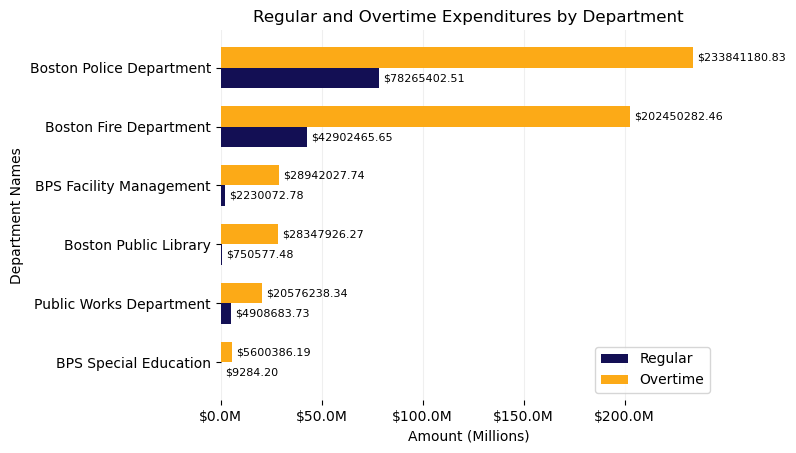

In [257]:
import matplotlib.pyplot as plt
import numpy as np

# Data
department_names = ['Boston Police Department', 'Boston Fire Department', 'BPS Special Education', 'BPS Facility Management', 'Boston Public Library', 'Public Works Department']
regular_data = [233841180.83, 202450282.46, 5600386.19, 28942027.74, 28347926.27, 20576238.34]
overtime_data = [78265402.51, 42902465.65, 9284.20, 2230072.78, 750577.48, 4908683.73]

# Sort the data in descending order based on the total amount (regular + overtime)
sorted_data = sorted(zip(department_names, regular_data, overtime_data), key=lambda x: sum(x[1:]))
sorted_names, sorted_regular_data, sorted_overtime_data = zip(*sorted_data)

# Define the bar width and locations
bar_width = 0.35
r1 = np.arange(len(sorted_names))
r2 = [x + bar_width for x in r1]

# Creating the figure and axis objects
fig, ax = plt.subplots()

# Adding vertical lines on the x-axis behind the bars
ax.grid(axis='x', linestyle='-', alpha=0.2, zorder=0)

# Creating the horizontal bar chart
bar1 = ax.barh(r1,sorted_overtime_data , height=bar_width, color='#130F54', label='Regular', zorder=2)
bar2 = ax.barh(r2, sorted_regular_data, height=bar_width, color='#FCAA17', label='Overtime', zorder=2)

# Setting the yticks and labels
ax.set_yticks([r + bar_width/2 for r in range(len(sorted_names))])
ax.set_yticklabels(sorted_names)

# Setting the labels and title
ax.set_ylabel('Department Names')
ax.set_xlabel('Amount (Millions)')
ax.set_title('Regular and Overtime Expenditures by Department')

# Formatting the x-axis tick labels to show values in millions
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x / 1000000:.1f}M'))

# Adding the values on the right side of each bar
for bar in [bar1, bar2]:
    for rect in bar:
        width = rect.get_width()
        ax.annotate('${:.2f}'.format(width), xy=(width, rect.get_y() + rect.get_height() / 2), xytext=(3, 0), textcoords="offset points", ha='left', va='center',fontsize=8)

# Adding the legend
ax.legend(loc='lower right')

# Remove border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Displaying the graph
plt.show()


In [145]:
#QUESTION 14

In [174]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv("sample2.csv", encoding='ISO-8859-1')



# Filter the DataFrame to only include rows where DEPARTMENT_NAME is "Boston Police Department"
boston_pd = df[df["DEPARTMENT_NAME"] == "Boston Police Department"]

# Save the filtered DataFrame to a new CSV file
boston_pd.to_csv("boston_pd_salary3.csv", index=False)


In [173]:
# Total Overtime Spend

import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary3.csv')

# sum up the values in the REGULAR column
regular_sum = df['OVERTIME'].str.replace(',', '').astype(float).sum()

print(f"The sum of the numerical values in the OVERTIME column is {regular_sum:.2f}")


The sum of the numerical values in the OVERTIME column is 72222785.03


In [172]:
# Average Overtime Spend (All Personnel)

import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary3.csv')

# sum up the values in the REGULAR column
regular_sum = df['OVERTIME'].str.replace(',', '').astype(float).mean()

print(f"The mean of the numerical values in the OVERTIME column is {regular_sum:.2f}")


The mean of the numerical values in the OVERTIME column is 29005.13


In [171]:
# Average Overtime Spend (Personnel Paid OT)

import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary3.csv')

# extract only positive values from the OVERTIME column and sum them up
overtime_pos = df.loc[df['OVERTIME'].str.replace(',', '').astype(float) > 0, 'OVERTIME'].str.replace(',', '').astype(float)
overtime_pos_mean = overtime_pos.mean()

print(f"The mean of the positive numerical values in the OVERTIME column is {overtime_pos_mean:.2f}")

The mean of the positive numerical values in the OVERTIME column is 29016.88


In [170]:
# Total Boston PD Personnel
len(boston_pd)

3094

In [169]:
# Boston PD Personnel Paid Overtime
len(overtime_pos)

2489

In [176]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv("sample.csv", encoding='ISO-8859-1')


# Filter the DataFrame to only include rows where DEPARTMENT_NAME is "Boston Police Department"
boston_pd = df[df["DEPARTMENT_NAME"] == "Boston Police Department"]

# Save the filtered DataFrame to a new CSV file
boston_pd.to_csv("boston_pd_salary4.csv", index=False)


In [177]:
# Total Overtime Spend

import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary4.csv')

# sum up the values in the REGULAR column
regular_sum = df['OVERTIME'].str.replace(',', '').astype(float).sum()

print(f"The sum of the numerical values in the OVERTIME column is {regular_sum:.2f}")


The sum of the numerical values in the OVERTIME column is 78265402.51


In [178]:
# Average Overtime Spend (All Personnel)

import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary4.csv')

# sum up the values in the REGULAR column
regular_sum = df['OVERTIME'].str.replace(',', '').astype(float).mean()

print(f"The mean of the numerical values in the OVERTIME column is {regular_sum:.2f}")


The mean of the numerical values in the OVERTIME column is 32247.80


In [179]:
# Average Overtime Spend (Personnel Paid OT)

import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('boston_pd_salary4.csv')

# extract only positive values from the OVERTIME column and sum them up
overtime_pos = df.loc[df['OVERTIME'].str.replace(',', '').astype(float) > 0, 'OVERTIME'].str.replace(',', '').astype(float)
overtime_pos_mean = overtime_pos.mean()

print(f"The mean of the positive numerical values in the OVERTIME column is {overtime_pos_mean:.2f}")

The mean of the positive numerical values in the OVERTIME column is 32274.54


In [180]:
# Total Boston PD Personnel
len(boston_pd)

3040

In [181]:
# Boston PD Personnel Paid Overtime
len(overtime_pos)

2425

Bar Graph

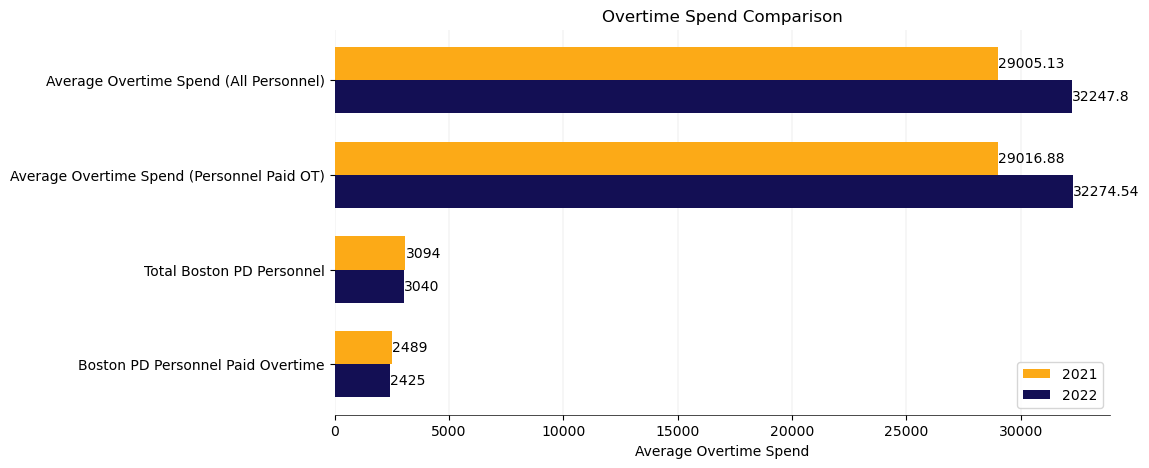

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
names = ['Average Overtime Spend (All Personnel)', 'Average Overtime Spend (Personnel Paid OT)',          'Total Boston PD Personnel', 'Boston PD Personnel Paid Overtime']
values_2021 = [29005.13, 29016.88, 3094, 2489]
values_2022 = [32247.80, 32274.54, 3040, 2425]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the horizontal bars for 2021 data
y_pos = np.arange(len(names))
width = 0.35
ax.barh(y_pos - width/2, values_2021, width,color='#FCAA17',label='2021', edgecolor='none')
ax.barh(y_pos + width/2, values_2022, width, color='#130F54',label='2022', edgecolor='none')

# Add vertical lines behind the bars
# Add vertical lines behind the bars for each value
for value in np.arange(0, max(values_2022), 5000):
    ax.axvline(x=value, color='gray', linestyle='-', linewidth=0.1, zorder=0)

# Add labels to the bars and axes
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Overtime Spend')
ax.set_title('Overtime Spend Comparison')
ax.legend(loc='lower right')

# Add labels to the bars
for i, v in enumerate(values_2021):
    ax.text(v + 10, i - width/2, str(v), color='black', ha='left', va='center')

for i, v in enumerate(values_2022):
    ax.text(v + 10, i + width/2, str(v), color='black', ha='left', va='center')

# Remove the borders around the figure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)

# Show the plot
plt.show()
